<a href="https://colab.research.google.com/github/nankengbertin/MIA5130-Ssyt-Opt-Mngt/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

**Data preprocessing and cleaning: Handle missing values, outliers, and inconsistencies in the data. Ensure data types are appropriate for analysis.**

In [65]:
# Load Data
df = pd.read_csv('JuiceJet.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [66]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [67]:
# Check for missing values
df.isnull().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [68]:
# Remove the Product Description column
df = df.drop(['Product Description'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [69]:
# Inspect current data types
display(df.dtypes)

# Convert date columns to datetime objects

df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# Display the data types after conversion
display(df.dtypes)

,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Category Name,object
Customer City,object


,0
Type,object
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Category Name,object
Customer City,object


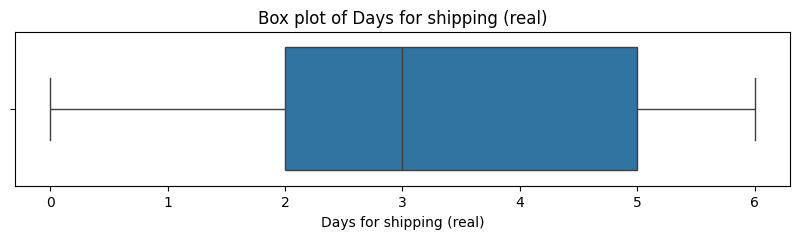

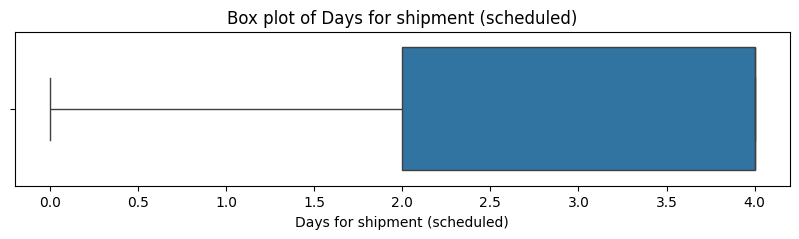

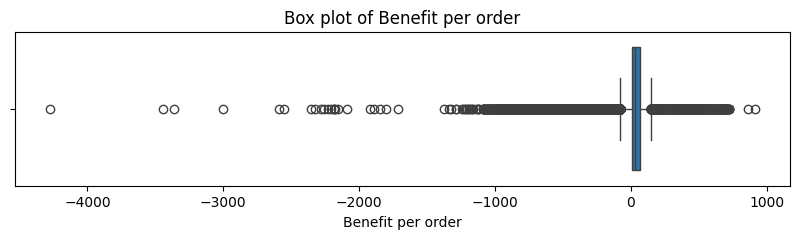

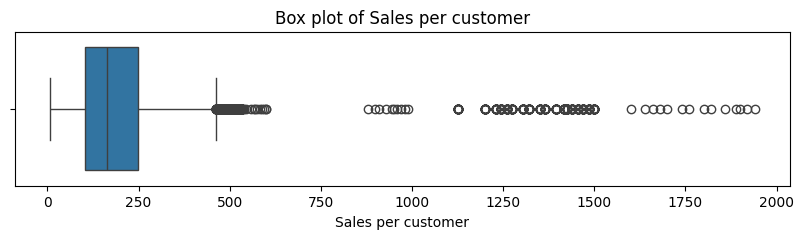

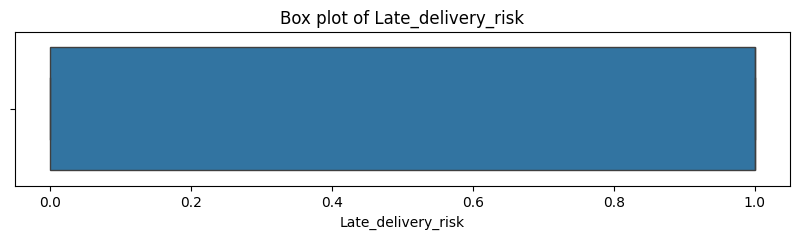

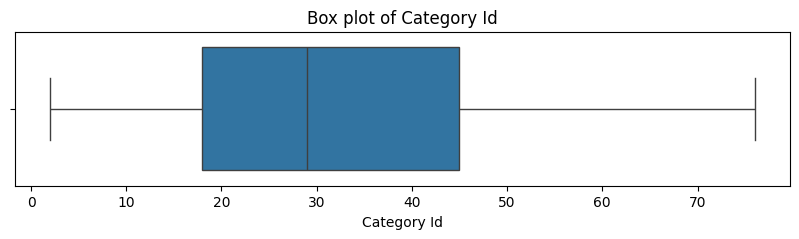

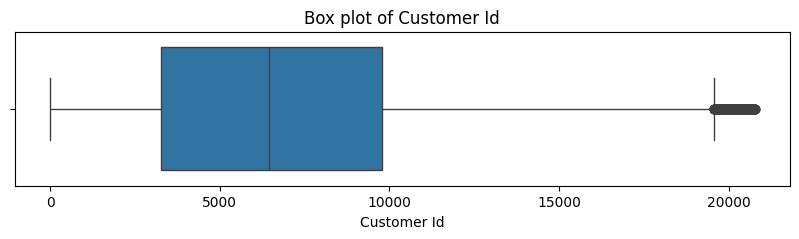

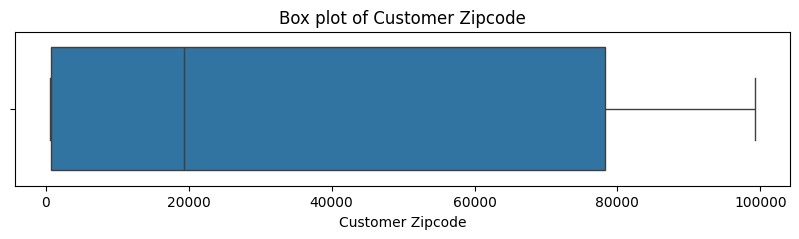

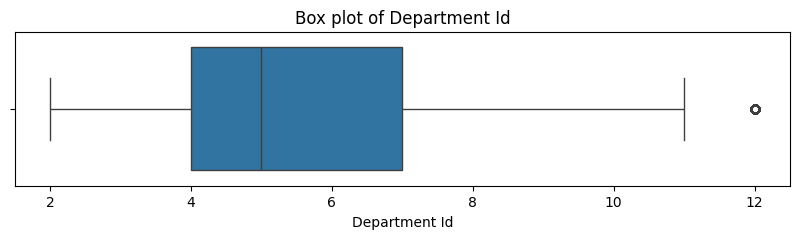

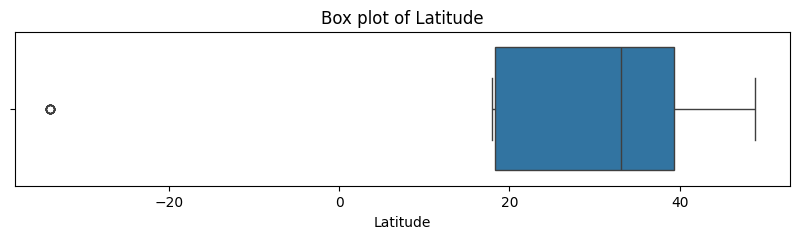

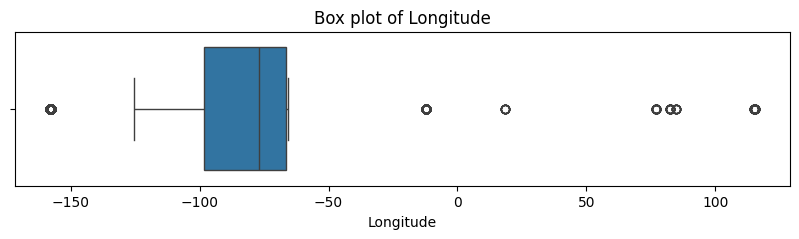

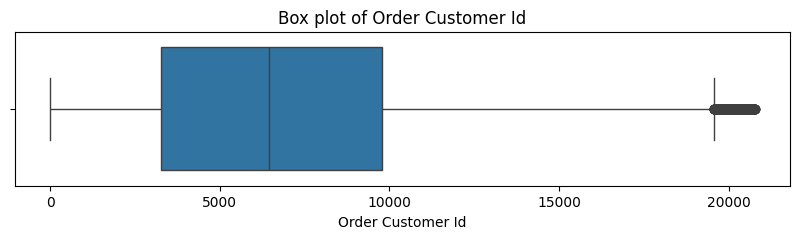

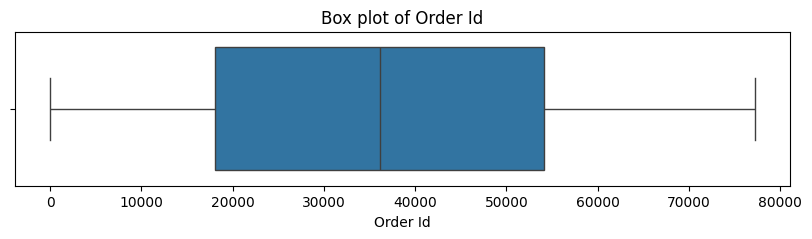

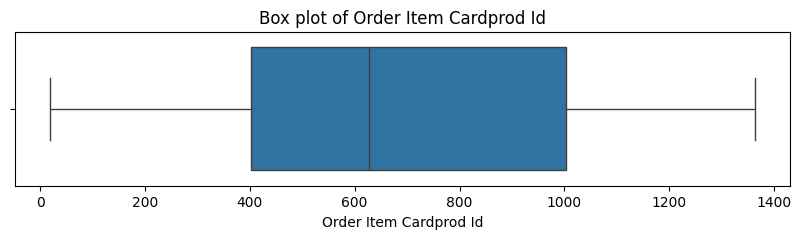

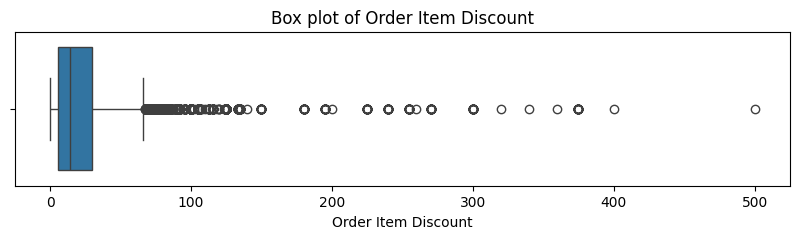

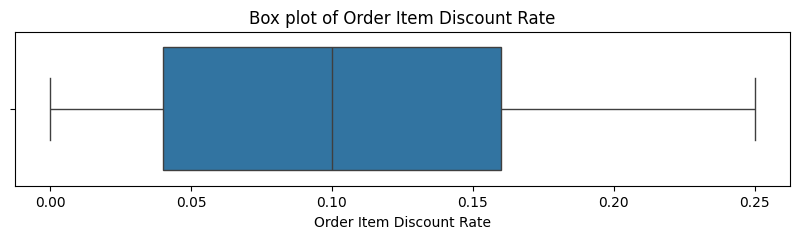

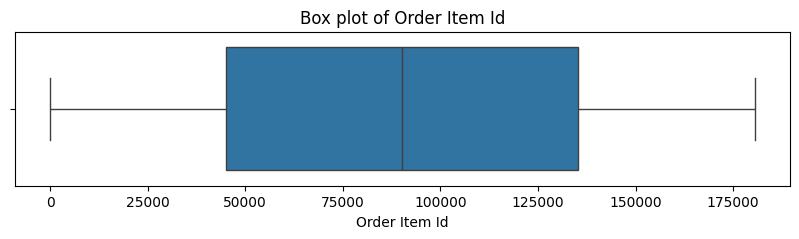

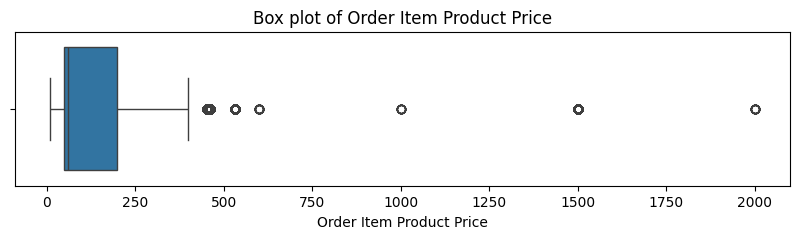

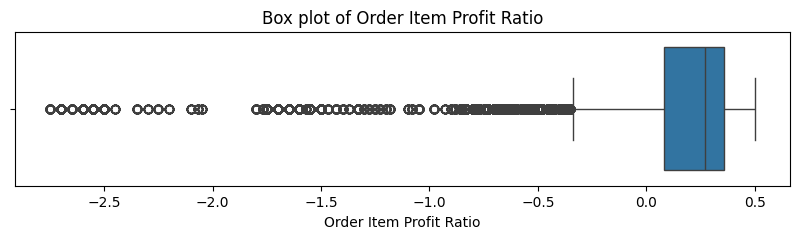

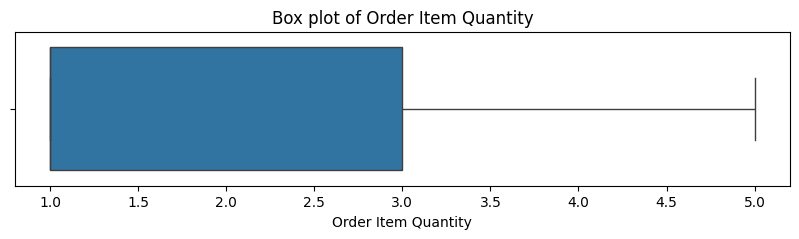

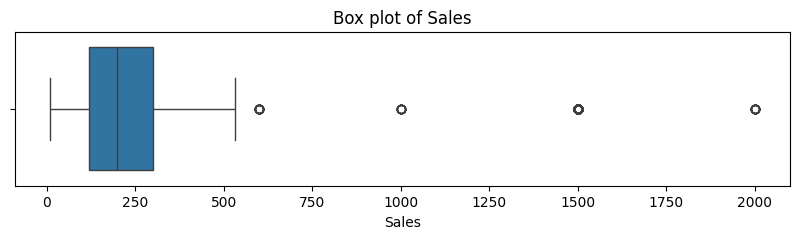

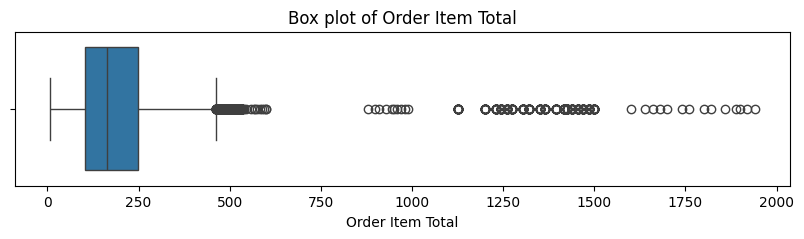

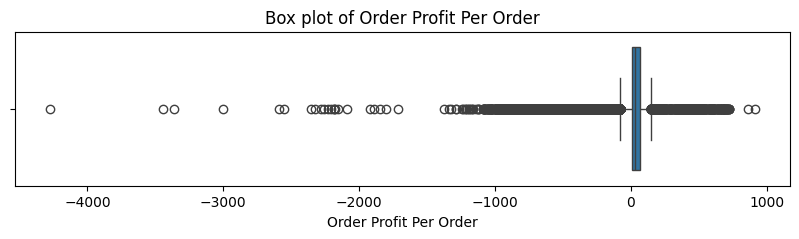

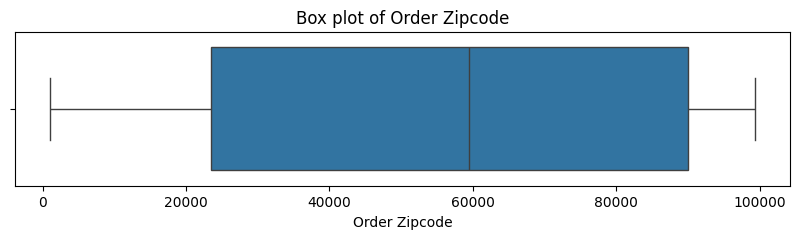

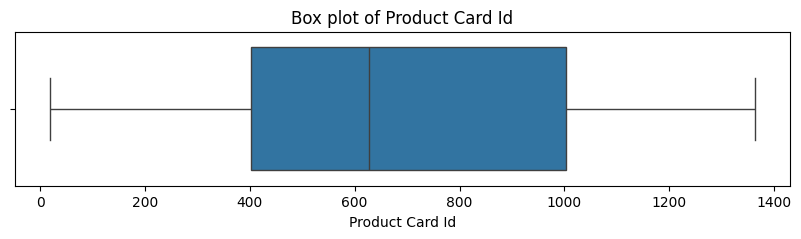

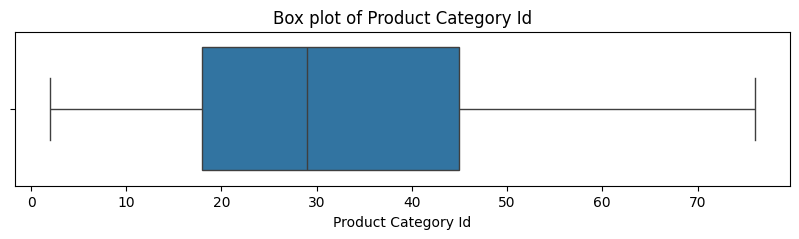

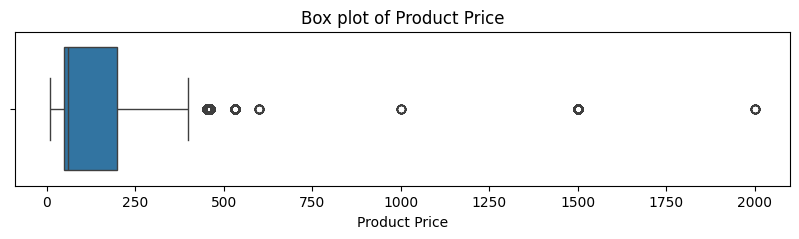

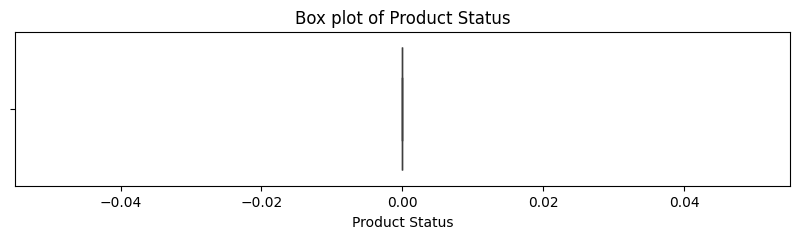

In [70]:
# Check for outliers in numerical columns using box plots
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

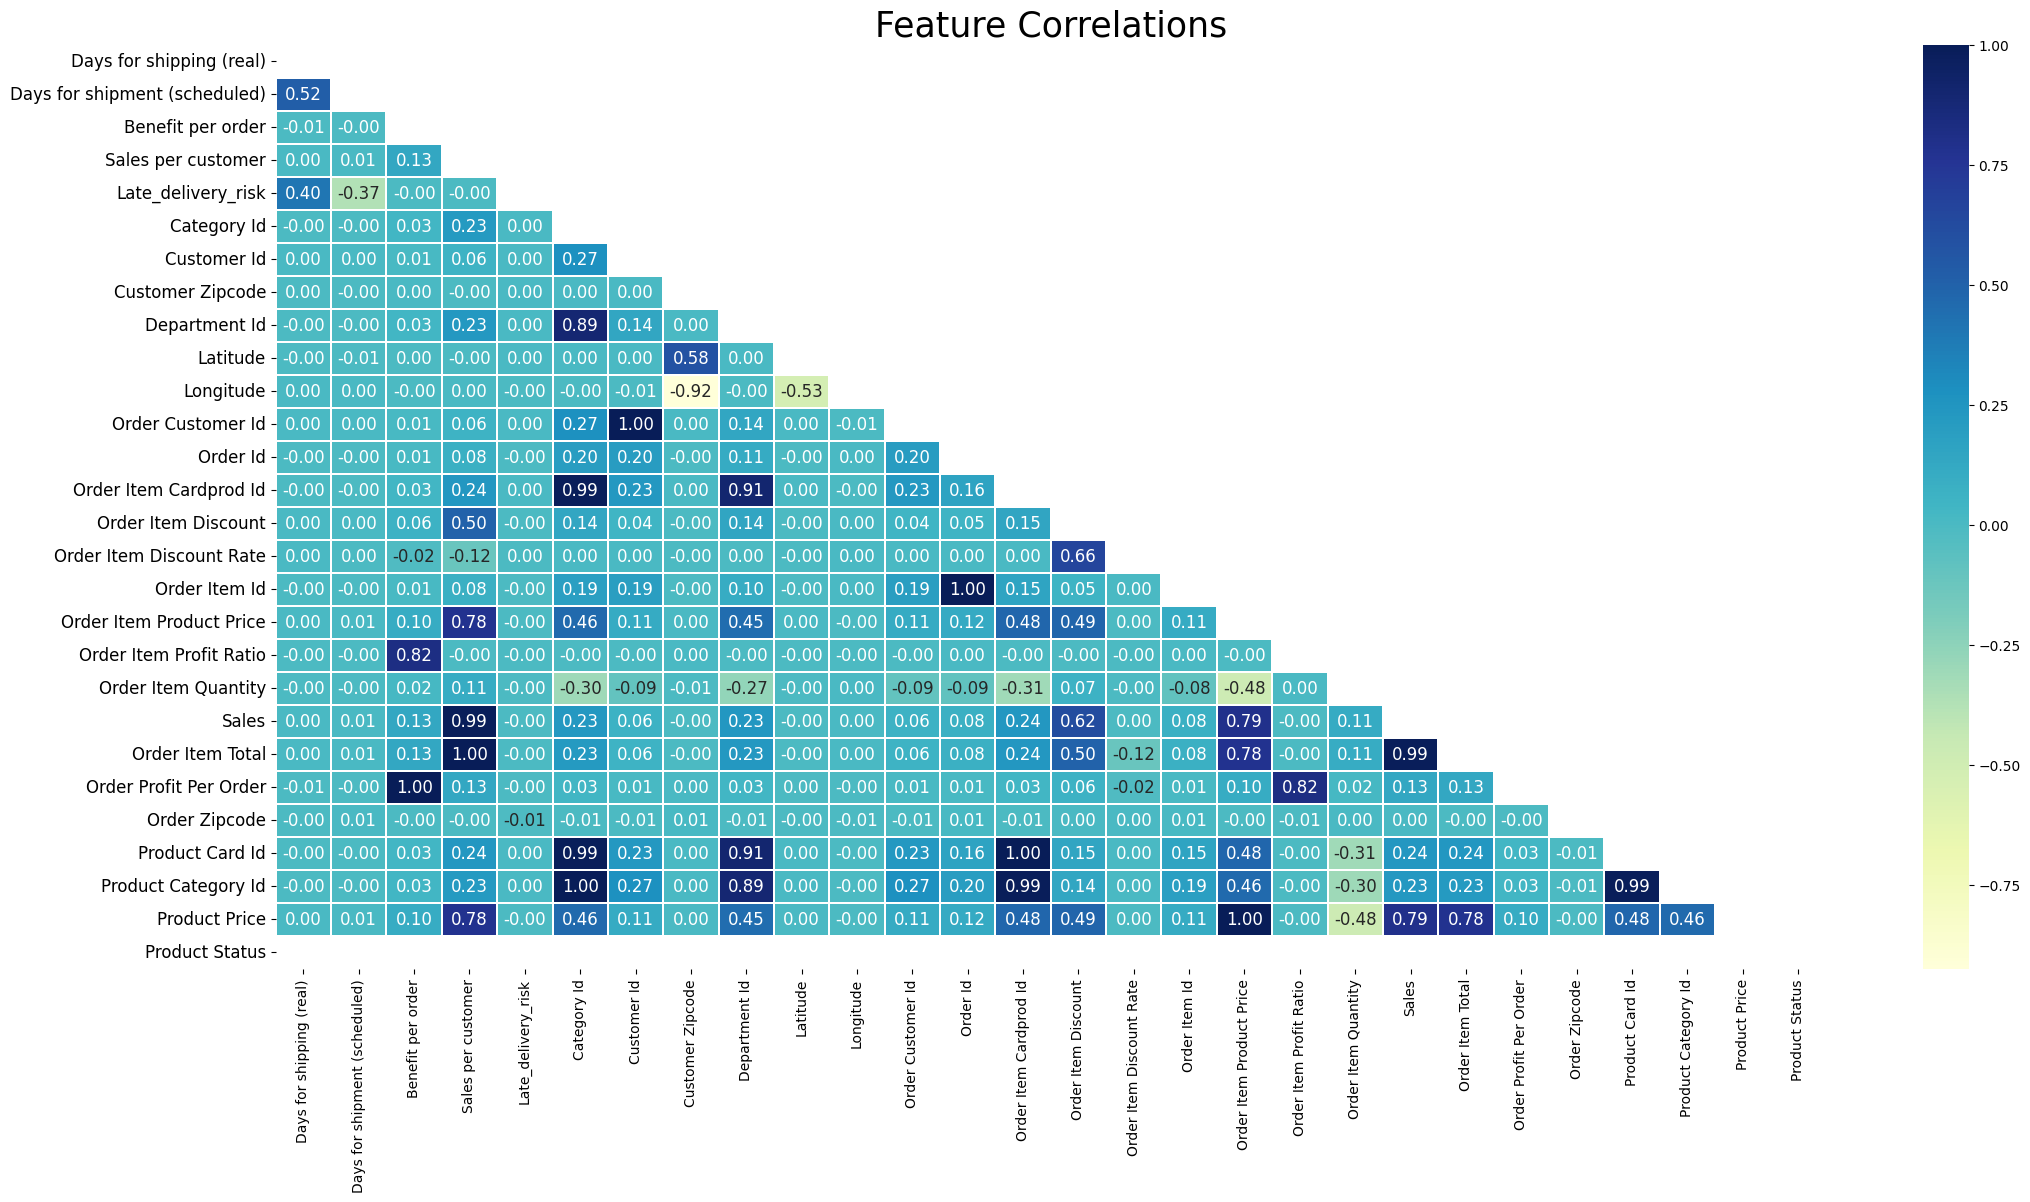

In [71]:
# Correlation matrix
df_corr = df.select_dtypes(include=np.number)
table = df_corr.corr()
matrix = np.triu(table)
fig, ax= plt.subplots(figsize=(25,12))
sns.heatmap(table, annot=True,fmt='0.2f', cmap=plt.cm.YlGnBu, mask=matrix, ax=ax, linewidths=0.1, linecolor='w', annot_kws={'fontsize': 12})
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=12)
ax.set_title('Feature Correlations', fontsize=25)
# rotate the tick labels for the x axis
plt.xticks(rotation=90)
plt.show()

In [72]:
# Drop highly correlated columns
threshold = 0.8

# Create a set to keep track of dropped columns
dropped_columns = set()

# Iterate over the correlation matrix
for i in range(len(table.columns)):
    for j in range(i):
        if abs(table.iloc[i, j]) > threshold:
            colname = table.columns[i]
            if colname not in dropped_columns:
                df = df.drop(colname, axis=1)
                dropped_columns.add(colname)

print(f"Dropped columns: {dropped_columns}")
df.info()

Dropped columns: {'Department Id', 'Order Item Id', 'Order Item Cardprod Id', 'Product Price', 'Order Customer Id', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Order Item Profit Ratio', 'Order Item Total', 'Longitude', 'Sales'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id        

In [73]:
# Display unique values in the 'Product Name' column
display(df['Product Name'].unique())

array(['Smart watch ', 'Perfect Fitness Perfect Rip Deck',
       "Under Armour Girls' Toddler Spine Surge Runni",
       "Nike Men's Dri-FIT Victory Golf Polo",
       "Under Armour Men's Compression EV SL Slide",
       "Under Armour Women's Micro G Skulpt Running S",
       "Nike Men's Free 5.0+ Running Shoe",
       "Glove It Women's Mod Oval 3-Zip Carry All Gol",
       'Bridgestone e6 Straight Distance NFL San Dieg',
       "Columbia Men's PFG Anchor Tough T-Shirt",
       'Titleist Pro V1x Golf Balls',
       'Bridgestone e6 Straight Distance NFL Tennesse',
       'Polar FT4 Heart Rate Monitor', 'ENO Atlas Hammock Straps',
       "adidas Men's F10 Messi TRX FG Soccer Cleat",
       "Brooks Women's Ghost 6 Running Shoe",
       "Nike Men's CJ Elite 2 TD Football Cleat",
       "Diamondback Women's Serene Classic Comfort Bi",
       'Industrial consumer electronics', 'Web Camera', 'Dell Laptop',
       'SOLE E25 Elliptical', 'Elevation Training Mask 2.0',
       "adidas Men's Germ

In [74]:
import random

# List of fruit and vegetable names
food_names = ['Apple', 'Banana', 'Orange', 'Grape', 'Strawberry', 'Blueberry', 'Mango', 'Pineapple', 'Watermelon', 'Kiwi',
              'Carrot', 'Broccoli', 'Spinach', 'Tomato', 'Cucumber', 'Bell Pepper', 'Potato', 'Sweet Potato', 'Onion', 'Garlic']

# Replace Product Name values with random fruit or vegetable names
df['Product Name'] = [random.choice(food_names) for _ in range(len(df))]

# Display the updated Product Name column
display(df['Product Name'].head())
display(df['Product Name'].unique())

,Product Name
0,Spinach
1,Garlic
2,Grape
3,Strawberry
4,Garlic


array(['Spinach', 'Garlic', 'Grape', 'Strawberry', 'Orange', 'Blueberry',
       'Broccoli', 'Watermelon', 'Bell Pepper', 'Kiwi', 'Onion',
       'Cucumber', 'Potato', 'Banana', 'Apple', 'Tomato', 'Pineapple',
       'Carrot', 'Mango', 'Sweet Potato'], dtype=object)

**Feature engineering: Create relevant features for forecasting, such as time-based features (e.g., day of week, month, year), lagged sales data, and potentially external factors like promotions or holidays.**

In [77]:
# Create time-based features from 'order date (DateOrders)'
df['order_year'] = df['order date (DateOrders)'].dt.year
df['order_month'] = df['order date (DateOrders)'].dt.month
df['order_day_of_week'] = df['order date (DateOrders)'].dt.dayofweek

# Create lagged sales feature - This requires sorting the data by product, location, and date
df = df.sort_values(by=['Product Name', 'Order City', 'order date (DateOrders)'])
df['lagged_sales'] = df.groupby(['Product Name', 'Order City'])['Order Item Quantity'].shift(1)

# Display the first few rows with the new features
display(df[['order date (DateOrders)', 'order_year', 'order_month', 'order_day_of_week', 'Order Item Quantity', 'lagged_sales']].head())

,order date (DateOrders),order_year,order_month,order_day_of_week,Order Item Quantity,lagged_sales
103106,2015-10-03 09:36:00,2015,10,5,1,NaN
91734,2017-10-01 18:54:00,2017,10,6,3,1.0
107716,2015-08-11 01:47:00,2015,8,1,3,NaN
36345,2016-08-31 16:18:00,2016,8,2,1,NaN
113006,2016-10-08 23:37:00,2016,10,5,2,1.0
